## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

## Load Dataset:

In [4]:
df = pd.read_csv('updated_ecommerce_returns.csv')
df.head()

,Order_ID,Product_ID,User_ID,Order_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,overall_return_rate,category_return_rate,product_return_rate,geography_return_rate,reason_pct_of_returns
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,Clothing,411.59,3,Changed mind,Returned,58,Male,City54,Debit Card,Next-Day,45.27,50.52,52.45,100,51.69,24.84
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,Books,288.88,3,Wrong item,Returned,68,Female,City85,Credit Card,Express,47.79,50.52,50.66,100,55.45,24.90
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,Toys,390.03,5,Not Mentioned,Not Returned,22,Female,City30,Debit Card,Next-Day,26.64,50.52,49.54,0,52.08,0.00
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,Toys,401.09,3,Not Mentioned,Not Returned,40,Male,City95,PayPal,Next-Day,15.37,50.52,49.54,0,55.42,0.00
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,Books,110.09,4,Not Mentioned,Not Returned,34,Female,City80,Gift Card,Standard,16.37,50.52,50.66,0,48.11,0.00


In [5]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())

Shape of dataset: (10000, 20)
Columns: ['Order_ID', 'Product_ID', 'User_ID', 'Order_Date', 'Product_Category', 'Product_Price', 'Order_Quantity', 'Return_Reason', 'Return_Status', 'User_Age', 'User_Gender', 'User_Location', 'Payment_Method', 'Shipping_Method', 'Discount_Applied', 'overall_return_rate', 'category_return_rate', 'product_return_rate', 'geography_return_rate', 'reason_pct_of_returns']


## Data understaning and cleaning:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order_ID               10000 non-null  object 
 1   Product_ID             10000 non-null  object 
 2   User_ID                10000 non-null  object 
 3   Order_Date             10000 non-null  object 
 4   Product_Category       10000 non-null  object 
 5   Product_Price          10000 non-null  float64
 6   Order_Quantity         10000 non-null  int64  
 7   Return_Reason          10000 non-null  object 
 8   Return_Status          10000 non-null  object 
 9   User_Age               10000 non-null  int64  
 10  User_Gender            10000 non-null  object 
 11  User_Location          10000 non-null  object 
 12  Payment_Method         10000 non-null  object 
 13  Shipping_Method        10000 non-null  object 
 14  Discount_Applied       10000 non-null  float64
 15  ove

In [7]:
df.isnull().sum() # Checking Null values

Order_ID                 0
Product_ID               0
User_ID                  0
Order_Date               0
Product_Category         0
Product_Price            0
Order_Quantity           0
Return_Reason            0
Return_Status            0
User_Age                 0
User_Gender              0
User_Location            0
Payment_Method           0
Shipping_Method          0
Discount_Applied         0
overall_return_rate      0
category_return_rate     0
product_return_rate      0
geography_return_rate    0
reason_pct_of_returns    0
dtype: int64

## Encode Target Variable:

In [8]:
# Encode target only
df['Return_Flag'] = df['Return_Status'].apply(lambda x: 1 if x == 'Returned' else 0)

print(df[['Return_Status','Return_Flag']].head())

  Return_Status  Return_Flag
0      Returned            1
1      Returned            1
2  Not Returned            0
3  Not Returned            0
4  Not Returned            0


We need a binary target for logistic regression.

## Select Features for Modeling:

In [9]:
# Features and target
categorical_cols = ['Product_Category','Return_Reason','User_Gender',
                    'User_Location','Payment_Method','Shipping_Method']

numerical_cols = ['Product_Price','Order_Quantity','User_Age','Discount_Applied',
                  'overall_return_rate','category_return_rate','product_return_rate',
                  'geography_return_rate','reason_pct_of_returns']

X = df[categorical_cols + numerical_cols]
y = df['Return_Flag']

## One-Hot Encode Categorical Features:

In [10]:
X_encoded = pd.get_dummies(X, drop_first=True)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

Shape before encoding: (10000, 15)
Shape after encoding: (10000, 122)


## Train-Test Split:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y)

## Scale Numerical Features:

In [12]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

## Train Logistic Regression Model:

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

## Evaluate Model:

In [14]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC-AUC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1484
           1       1.00      1.00      1.00      1516

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



## Feature Importance:

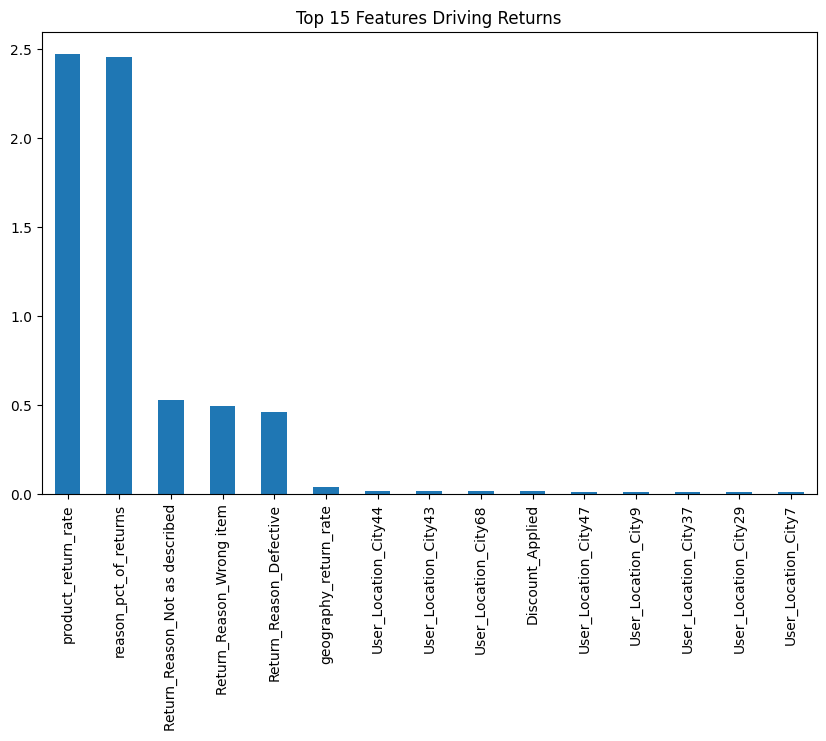

In [15]:
importance = pd.Series(model.coef_[0], index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importance[:15].plot(kind='bar')
plt.title("Top 15 Features Driving Returns")
plt.show()

## Save Model Predictions:

In [16]:
df_results = df[['Order_ID','Product_ID','User_ID','Product_Category','User_Location','Return_Status']]
df_results['Predicted_Prob'] = model.predict_proba(X_encoded)[:,1]
df_results['Predicted_Label'] = model.predict(X_encoded)

df_results.to_csv("ecommerce_return_predictions.csv", index=False)
print("Predictions exported to ecommerce_return_predictions.csv")

Predictions exported to ecommerce_return_predictions.csv


## Return Rate by Category:

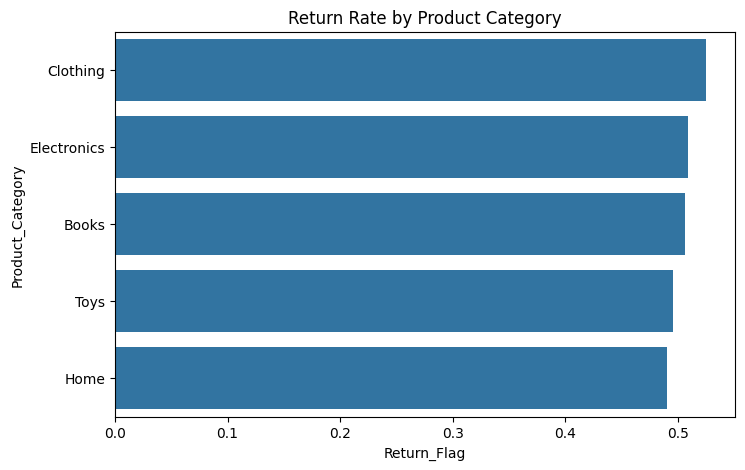

In [17]:
cat_return_rate = df.groupby('Product_Category')['Return_Flag'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=cat_return_rate, y=cat_return_rate.index)
plt.title("Return Rate by Product Category")
plt.show()

## Return Rate by Location:

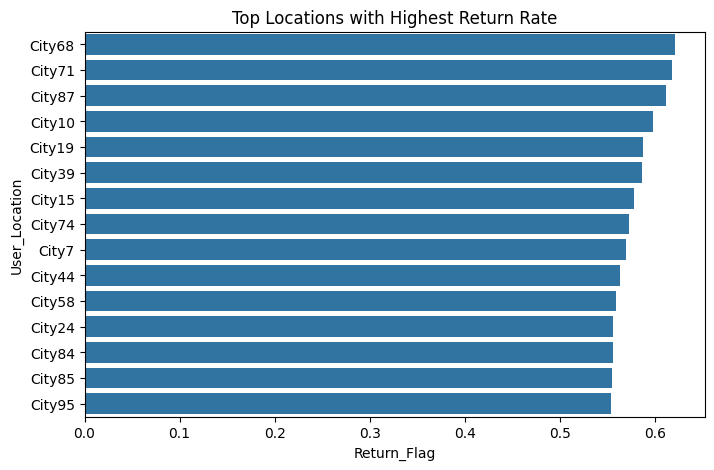

In [18]:
loc_return_rate = df.groupby('User_Location')['Return_Flag'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=loc_return_rate, y=loc_return_rate.index)
plt.title("Top Locations with Highest Return Rate")
plt.show()

## Return Reasons distribution:

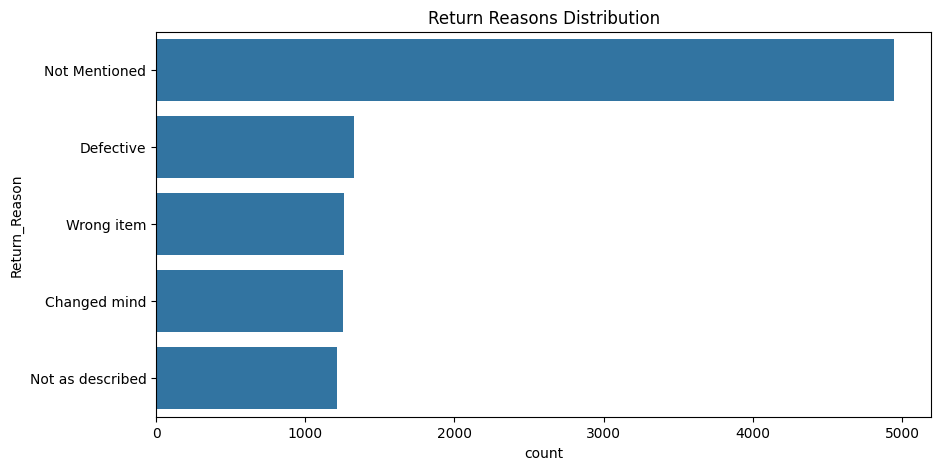

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Return_Reason', order=df['Return_Reason'].value_counts().index)
plt.title("Return Reasons Distribution")
plt.show()